In [7]:
pip install opendatasets --upgrade

In [2]:
import opendatasets as od

In [4]:
download_url = 'https://www.kaggle.com/competitions/titanic/data'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kanishkarya1
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 37.8MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In this notebook, I will go through my solution and analysis of the Kaggle Titanic survival Analysis.

This is a classic beginner's project suited for anyone who is looking to gain some hands-on experience with data science and machine learning. I hope you will find some value out of this notebook.


**Training set**
This is the dataset that you will be working on predominantly. You will perform manipulation and analysis on this dataset to extract insights as well as build a predictive model. The goal here is to determine and create features that will help us predict the outcome of our data. There are two types of problems in machine learning and they are classfication and regression problems. Titanic is an example of a classification problem where the outcome is categorical. In other words, our model needs to be able to predict and classify outcomes as either one of two categories, survived or did not survive the titanic.

**Test set**
Once our model has been built, we need to make sure that it does not merely fit our training set well but also able to make predictions on out-of-samples data, that is data our model has not been trained on. We will use the testing set as inputs to the model that we have built and make predictions based on those inputs. This is where you will be assessed in the competition i.e. how accurate is your model at predicting new observations. It is also important to note that every competition has different metrics in which they assess model accuracy and you can find this information under the evaluation tab in the overview section of the competition page. For this competition, the evaluation metric is simply the percentage of passengers that are correctly predicted by our model.

In [6]:
data_filename = './titanic/train.csv'

**1. Import libraries**

Here I am import the libraries that I will be using in my notebook. Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis.

In [43]:
from ast import increment_lineno
# import basic data analysis modules
import pandas as pd
import numpy as  np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for data encoding and  transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#for ignoring the warnings in notebook from python
import warnings
warnings.filterwarnings('ignore')

**2. Import and read data**

Now import and read the 3 datasets as outlined in the introduction.

In [83]:
df_train = pd.read_csv(data_filename)

**3. Dataset Backup **

Make the  original dataset Backup. It is important to establish backup and recovery procedures for data sets so you can replace a destroyed or damaged data set with its backup copy.

In [84]:
original_df = df_train.copy(deep = True)

In [85]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df_train.shape[1], df_train.shape[0]))


Inference: The Datset consists of 12 features & 891 samples.


In [87]:
df_train.shape

(891, 12)

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**4. Data description**

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than 1

SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [90]:
df_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**5. Exploratory Data Analysis (EDA)**

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

Data types, missing data and summary statistics

In [91]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the age column we have 177 Null values. In Embarked column we hace 2 missing values. Similarly
in the Cabin feature, we have 687 Null values which is Huge. we have only 23% of values present
in the data set and 77% of values are missing.

In [92]:
# to check if there are any duplicate values in a dataset
df_train.duplicated().sum()

0

In [93]:
df_train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [94]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [95]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [96]:
df_train['Pclass'].unique()

array([3, 1, 2])

Since Cabin coulumn has many missing values, we can drop this feature while making our model
as it will affect our calculations. Also PassengerId doesnt seem to play any role in the dataset. So
we can drop that column too. Name and ticket also dont seem to affect chances of survival so its
3
best to get rid of them as well so that we can focus on the necessary Features.

In [97]:
df_train.drop('Cabin', axis= 1, inplace = True)

In [98]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now to deal with missing Age values
Average age in the dataset is 29.7 years with std deviation of 14.52. It means most of the people
have age in the range (29.7 - 14.52) to (29.7 + 14.52) because in a Continuous Random Variable
most of the values can be found in the range of (mean-std) to (mean+std). The min age is 0.42
years and max age is 80 years old. So I am going to fill in the missing age with mean age which is
29.7= 30 here.

I am identify the Inter quartile range

In [100]:
q1 = df_train['Age'].quantile(.25)

In [101]:
q1

20.125

In [102]:
q3 = df_train["Age"].quantile(0.75)

In [103]:
q3

38.0

In [104]:
iqr = q3 - q1

In [105]:
iqr

17.875

In [106]:
no_outliers = df_train.Age[(q1 - 1.5*iqr < df_train.Age) &  (df_train.Age < q3 + 1.5*iqr)]
outliers = df_train.Age[(q1 - 1.5*iqr >= df_train.Age) |  (df_train.Age >= q3 + 1.5*iqr)]

Made the dynamic function for check the outliers

In [107]:
def outlier_thresholds(dataframe, col_name,q1=0.25, q3=0.75):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    return low_limit, up_limit


In [109]:
outlier_thresholds(df_train, "Age")

(-6.6875, 64.8125)

In [74]:
#Write a function that check if there is any outliers.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [110]:
check_outlier(df_train, "Age")

True

I am try to detect outliers in a numerical 'Age' column by using

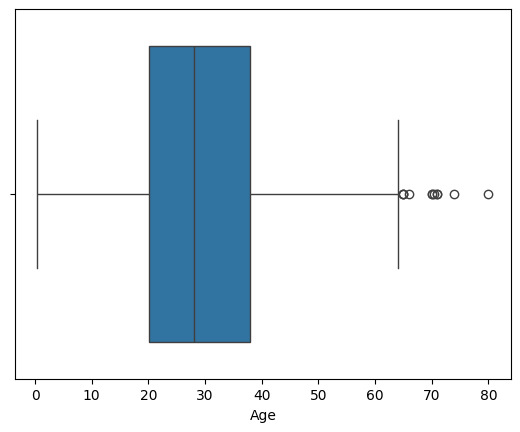

In [111]:

sns.boxplot(x=df_train["Age"])
plt.show()

In [112]:
df_train.Age.fillna(df_train['Age'].mean(), inplace = True)

In [113]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now to deal with 2 missing Embarked values For 2 missing values of Embarked, I am going
to fill in those values with most frequent value since Embarked is a Category datatype. For that I
will use value_counts to find out the most frequent value in Embraked column.

In [115]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [116]:
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [117]:
df_train.Embarked.fillna('S', inplace = True)

In [118]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [119]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

I am going to analyse each column
separately and in relation to each other.

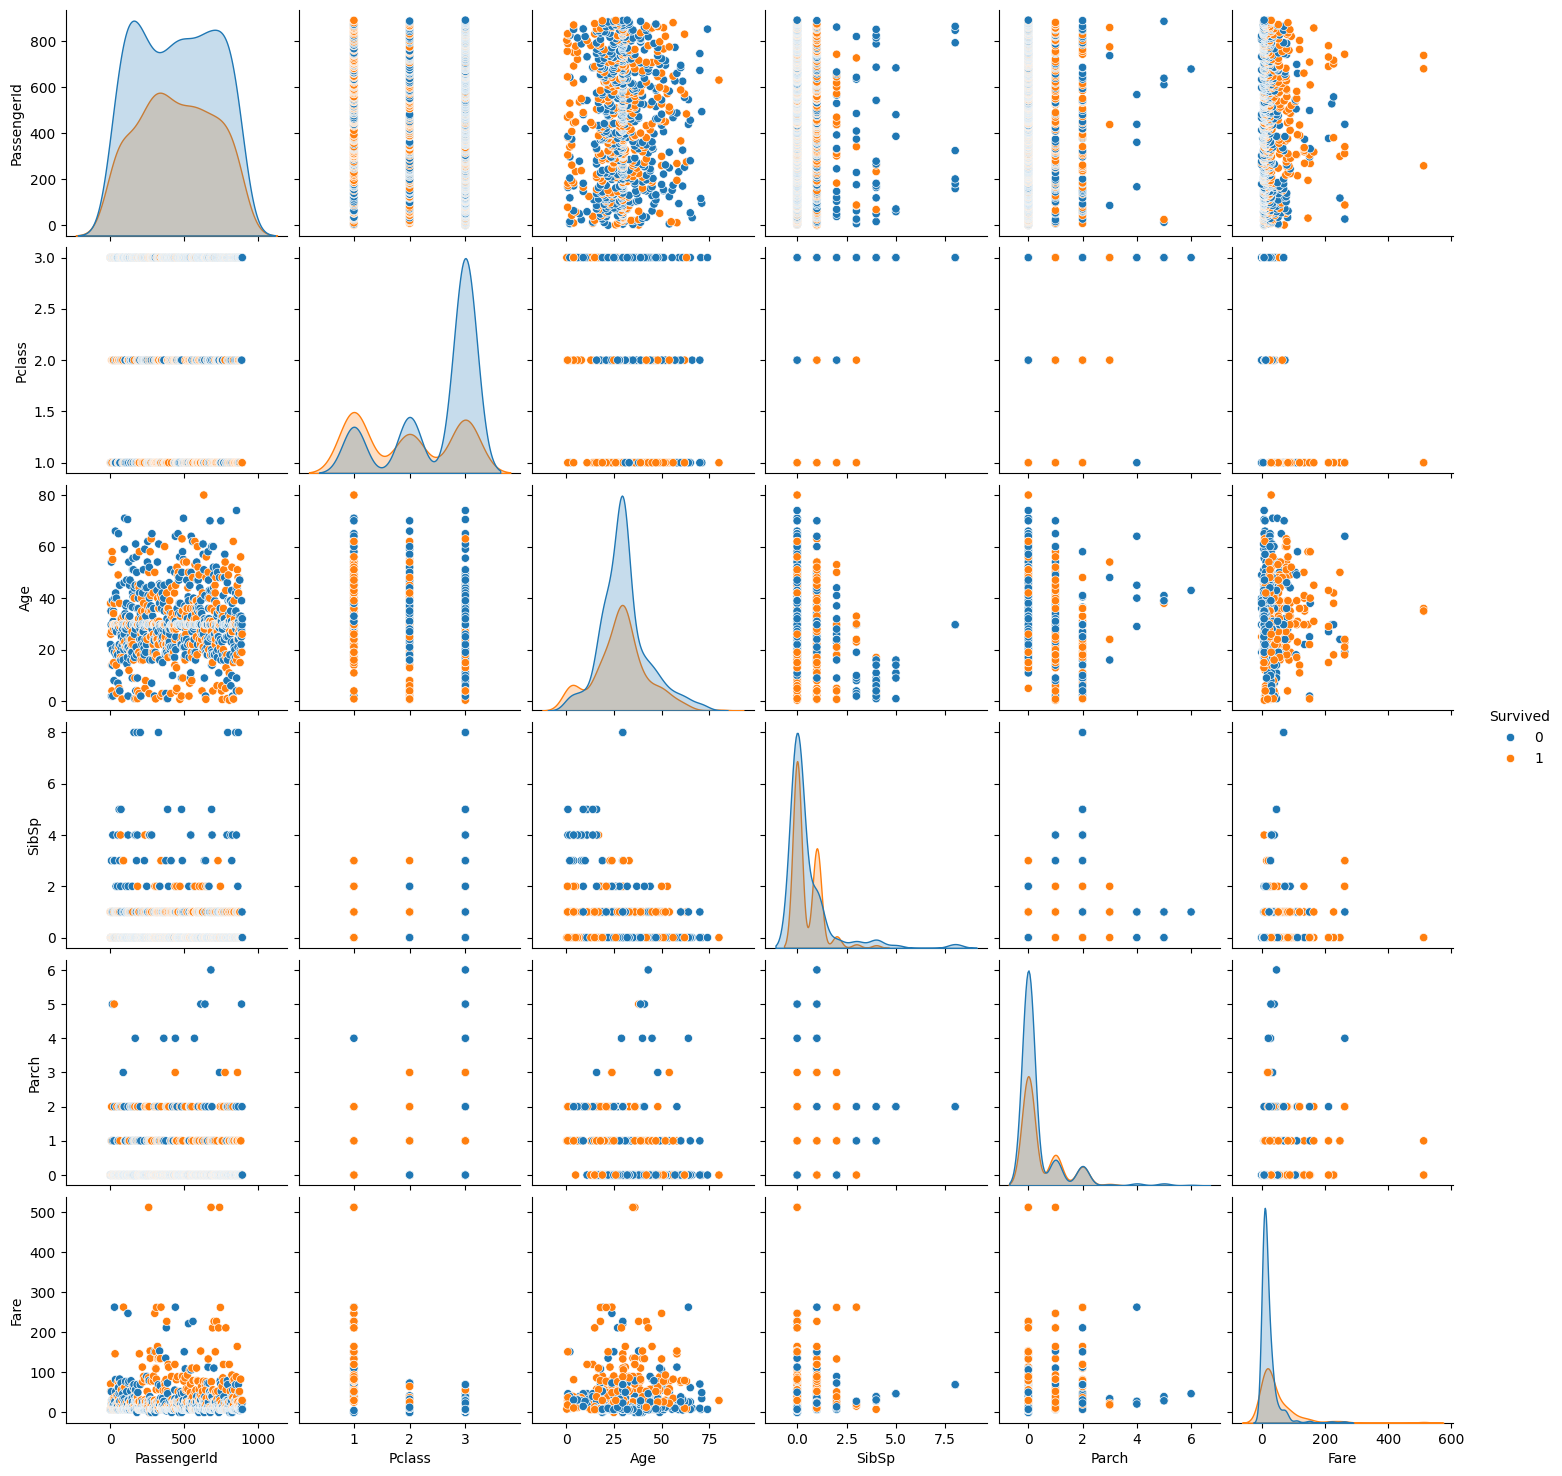

In [120]:
sns.pairplot(df_train,hue="Survived")

In Survived column, 1 means the person survived and 0 means that person didnt survive. From the
above grid of plots, we can see that passengers who paid higher fares or traveling in the upper class
had a higher chance to survive. Age is also giving some info that younger persons had a higher
chance to survive than older people. Also from the look of it, female had a better chance of survival
than the male. The passengers who embarked from Cherbourg had a better chance of survival then
the passengers who embraked from Queenstown and Southampton.

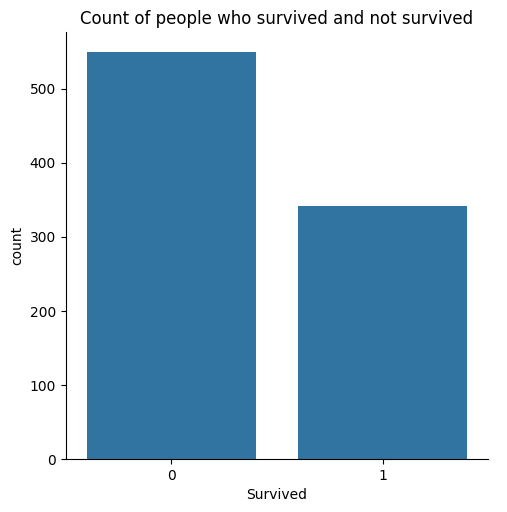

In [122]:
sns.catplot(x = "Survived", kind = 'count', data = df_train).set(title = "Count of people who survived and not survived")

In Survived column 1 means the person survived and 0 means that person didnt survive. The
analysis shows majority of the people didnt survive, that is out of the total of 891 passengers, 549
didnt survive and 342 passengers survived.

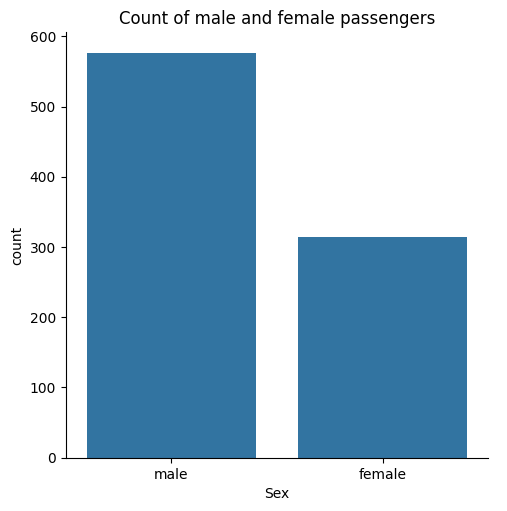

In [123]:
sns.catplot(x = 'Sex', kind = 'count', data = df_train).set(title = "Count of male and female passengers")

The analysis shows there were more male passengers on the ship than female.

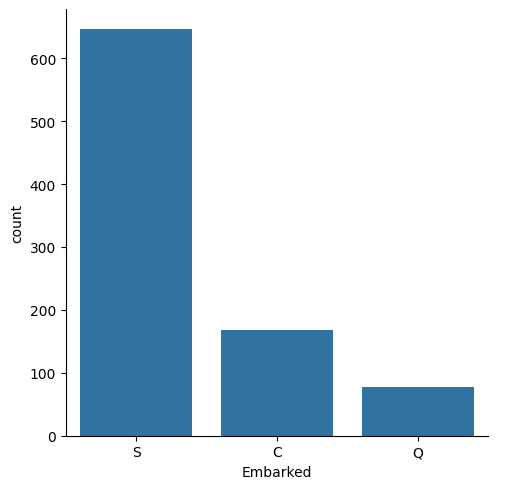

In [124]:
sns.catplot(x = 'Embarked', kind = 'count', data = df_train)

Maximum number of passenegrs embarked from Southampton town and least numb er of people
embarked from Queenstown.

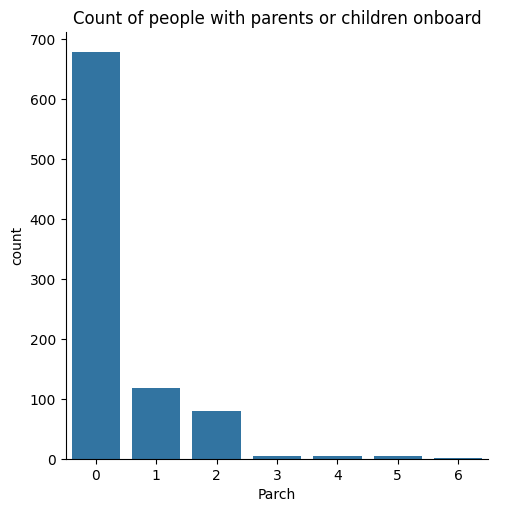

In [126]:
sns.catplot(x = 'Parch', kind = 'count', data = df_train).set(title = "Count of people with parents or children onboard")

Most people had no Children or Parent/s with them onboard.

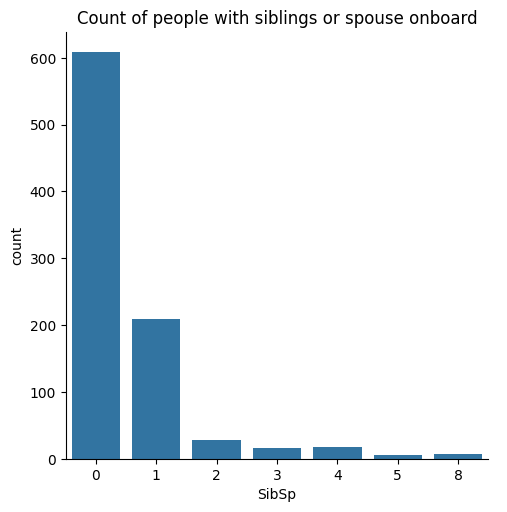

In [131]:
sns.catplot(x = 'SibSp', kind = 'count', data = df_train).set(title = "Count of people with siblings or spouse onboard")

Most people had no Siblings or Spouse with them onboard.

**Feature engineering**

It is a preprocessing step in machine learning and statistical modeling that transforms raw data into a more effective set of inputs for training and prediction. The inputs are made up of several attributes, called features. The accuracy of a machine learning (ML) model depends on the precise set and composition of features.

In [130]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [132]:
df_train['Age'].skew()

0.4344880940129925

Skewness is  a measure of asymmetric that indicates whether the observation in a dataset are concentrated on one side.

<Axes: ylabel='Density'>

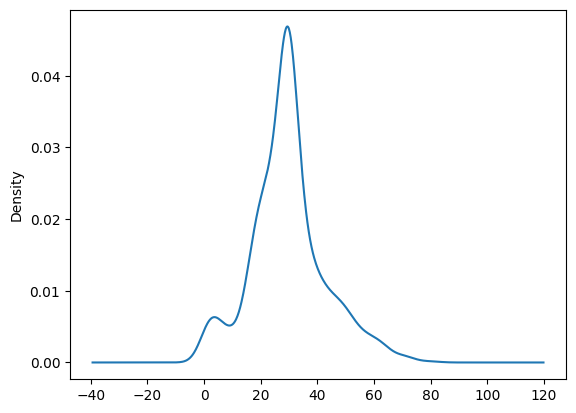

In [136]:
df_train['Age'].plot(kind='kde')

The age column the skewness is 0.43 for this skewness we can say that it is approxmately normal distributed(Consider as approximately as Normal distribution: -0.5 to 0.5)

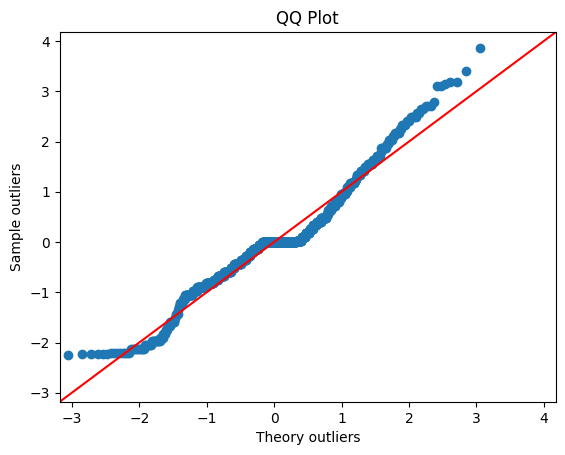

In [138]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# create a  qq plot  of the two set of data
fig = sm.qqplot(df_train['Age'], line = '45', fit = True)

plt.title("QQ Plot")
plt.xlabel("Theory outliers")
plt.ylabel('Sample outliers')

plt.show()

QQ plot stands  for Quantile- Quantile plot is a graphical tool used to access the similarity of the distribution of two set of data. It is particularly useful for determining whether a set of data follows a normal distribution or not. Asour QQ plot indicates that Age feature is approximately follows the Normal Distribution

In [133]:
df_train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [137]:
df_train['Fare'].skew()

4.787316519674893

The age column the skewness is 4.787 for this skewness we can say that it is log normal Distribution (Consider as approximately as Normal distribution: -0.5 to 0.5)

In [134]:
df_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

<Axes: ylabel='Density'>

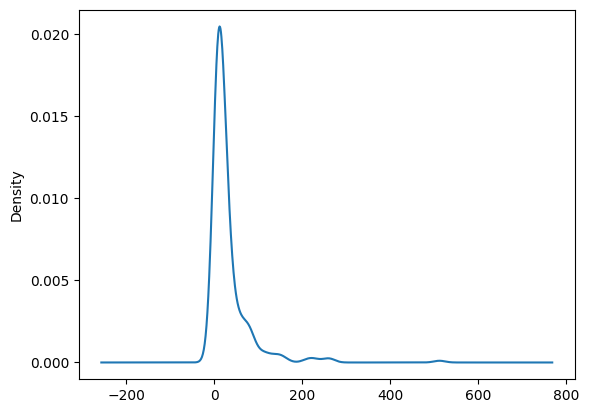

In [135]:
df_train['Fare'].plot(kind='kde')

We can say that 80% pf people spend 20% of expenses

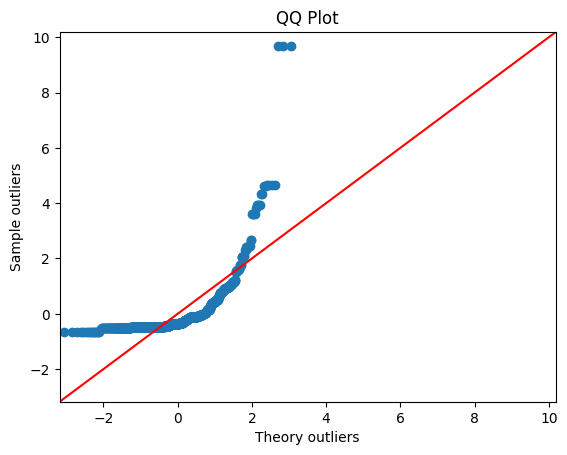

In [140]:
fig = sm.qqplot(df_train['Fare'], line = '45', fit = True)

plt.title("QQ Plot")
plt.xlabel("Theory outliers")
plt.ylabel('Sample outliers')

plt.show()

**Data transformation**

It involves modifying data values to create a distribution appropriate for analysis. For example, a set of values in a dataset might be severely skewed or be inconsistently scaled. Examples of transforming data values include log, square root, or cube transformations; data standardizing or normalizing; or outlier removal.

The goal is to create data values suitable for various statistical and machine learning

**Log Transformation**

Its make our data close to a normal distribution but are not able to exactly abide by a normal distribution. – This transformation is not applied to those features which have negative values. – This transformation is mostly applied to right-skewed data.

In [145]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

transform_fare = FunctionTransformer(func = np.log1p)

In [146]:
transform_fare

FunctionTransformer(func=<ufunc 'log1p'>)

In [149]:
transform_fare_df_train = transform_fare.fit_transform(df_train['Fare'])

In [150]:
transform_fare_df_train

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

<Axes: ylabel='Density'>

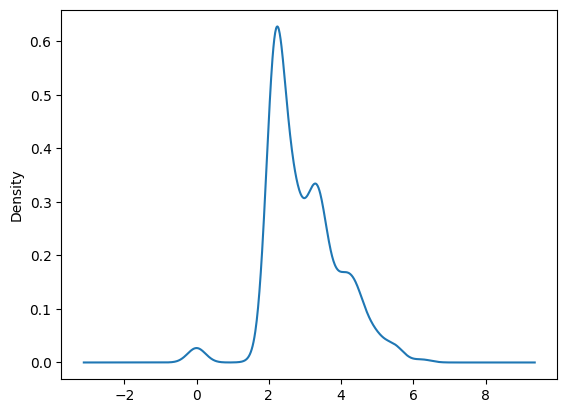

In [157]:
transform_fare_df_train.plot(kind='kde')

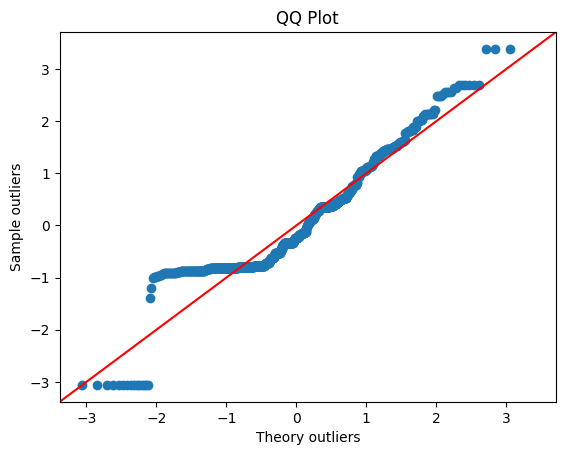

In [156]:
fig = sm.qqplot(transform_fare_df_train, line = '45', fit = True)

plt.title("QQ Plot")
plt.xlabel("Theory outliers")
plt.ylabel('Sample outliers')

plt.show()

After apply the log transformation, the fare feature transform from Log normal distribution to approximately Normal Distribution

In [158]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now focus on the Age feature and analyze the data distribution

In [217]:
df_train['Age'].skew()

0.4344880940129925

In [218]:
df_train['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [219]:
df_train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

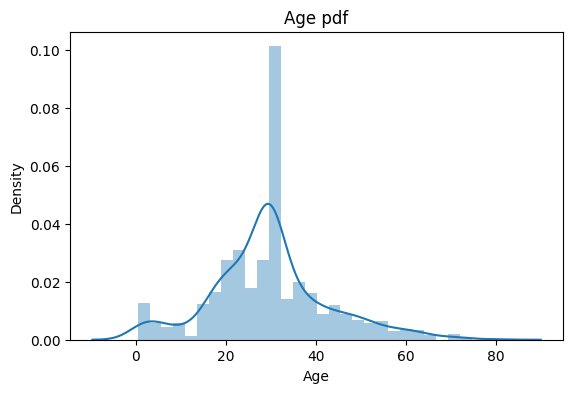

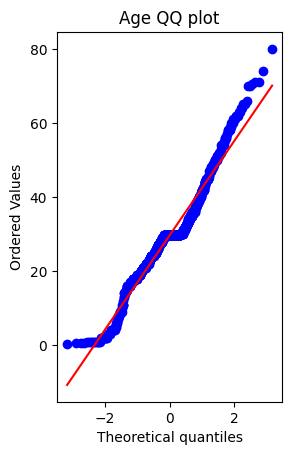

In [220]:
import scipy.stats as stats

plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df_train['Age'])
plt.title("Age pdf")
plt.show()

plt.subplot(121)
stats.probplot(df_train['Age'], dist = 'norm', plot = plt)
plt.title("Age QQ plot")

plt.show()

I have analyze that according to QQ plot Age feature is already approx. Normal Distribution

**Central limit theorem**

The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal.
The criteria for CLT is that the sample is greater and equal to 30.

In [221]:
# sample size 50 of 100 times
df_train['Age'].sample(50)

876    20.000000
188    40.000000
784    25.000000
343    25.000000
460    48.000000
303    29.699118
414    44.000000
13     39.000000
213    30.000000
75     25.000000
667    29.699118
496    54.000000
384    29.699118
160    44.000000
582    54.000000
253    30.000000
400    39.000000
411    29.699118
252    62.000000
740    29.699118
861    21.000000
448     5.000000
12     20.000000
553    22.000000
424    18.000000
534    30.000000
144    18.000000
278     7.000000
109    29.699118
735    28.500000
677    18.000000
630    80.000000
257    30.000000
640    20.000000
566    19.000000
676    24.500000
287    22.000000
330    29.699118
353    25.000000
654    18.000000
11     58.000000
556    48.000000
302    19.000000
759    33.000000
399    28.000000
515    47.000000
327    36.000000
2      26.000000
789    46.000000
719    33.000000
Name: Age, dtype: float64

In [222]:
samples = []
for i in range(100):
  samples.append(df_train['Age'].sample(50).values.tolist())


In [223]:
sample = np.array(samples)

In [224]:
sample

array([[36.        , 32.        ,  6.        , ..., 34.        ,
        18.        ,  4.        ],
       [33.        ,  9.        , 29.69911765, ..., 34.        ,
        29.69911765, 19.        ],
       [38.        , 29.        , 40.5       , ..., 14.        ,
        29.69911765, 32.        ],
       ...,
       [24.        , 32.5       , 17.        , ..., 40.        ,
        29.69911765, 34.        ],
       [18.        , 40.        , 21.        , ..., 15.        ,
        29.69911765, 20.        ],
       [ 0.42      , 27.        , 45.        , ..., 24.        ,
        17.        , 29.69911765]])

In [229]:
sample_means = sample.mean(axis = 1)

In [230]:
sample_means

array([29.24982353, 27.59822353, 28.55982353, 31.88584118, 32.66424118,
       26.67677059, 27.51229412, 30.17389412, 30.43982353, 30.01584118,
       27.83982353, 27.75880588, 28.72092941, 31.31424118, 31.57822353,
       30.70822353, 31.38778824, 29.78880588, 31.69584118, 31.80084118,
       28.66185882, 30.35177059, 29.98973529, 29.98822353, 30.70252941,
       28.85627647, 34.05982353, 26.78584118, 27.66729412, 31.27177059,
       29.32982353, 30.58787647, 25.74017059, 31.93084118, 30.52220588,
       30.97991176, 30.94973529, 30.65177059, 27.83075294, 28.45584118,
       30.06177059, 28.81185882, 31.66924118, 31.36584118, 31.66778824,
       30.98778824, 27.58177059, 30.13229412, 30.18177059, 32.21177059,
       30.71380588, 30.06720588, 30.64185882, 27.70084118, 28.33787647,
       30.30244118, 28.33982353, 31.27031765, 31.61982353, 31.10177059,
       30.08177059, 28.06982353, 27.59627647, 30.54787647, 29.70764118,
       29.95575294, 30.69084118, 30.34982353, 26.09380588, 28.77

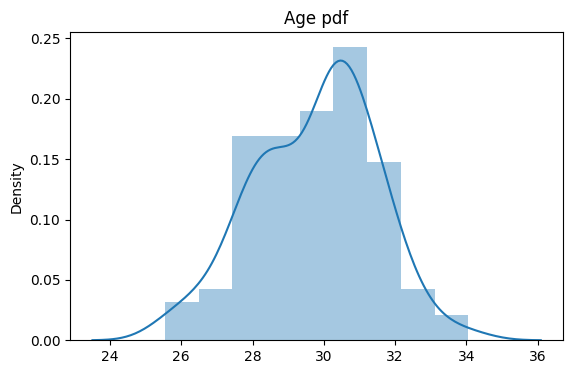

In [231]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(sample_means)
plt.title("Age pdf")
plt.show()

After applying the CLT the age feature is Normally Distibuted

**Feature encoding**

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

I have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [233]:
#now we need to convert sex into integer value
d={'male':0, 'female':1}
df_train['Sex']=df_train['Sex'].apply(lambda x:d[x])
df_train['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [235]:
e={'C':0, 'Q':1 ,'S':2}
df_train['Embarked']=df_train['Embarked'].apply(lambda x:e[x])
df_train['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

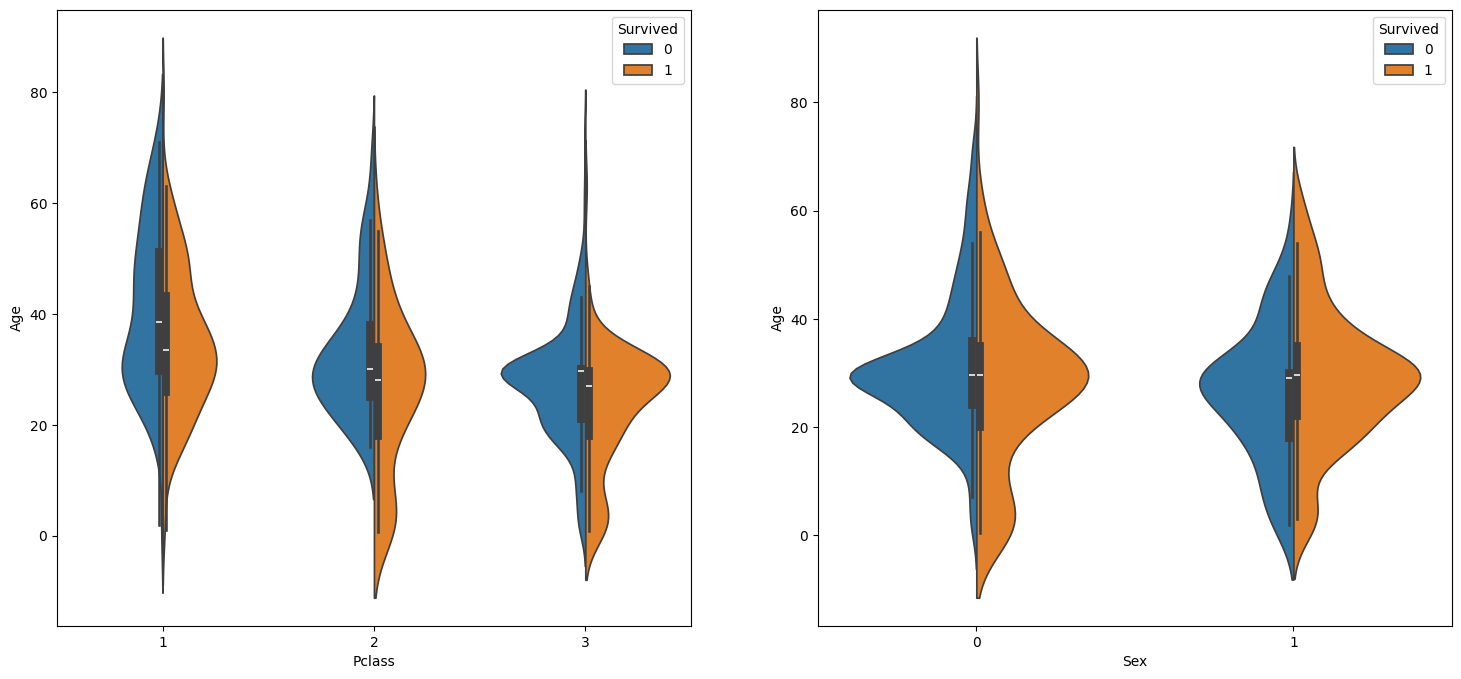

In [239]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x ="Pclass",y = "Age",hue="Survived",data = df_train, split=True, ax=ax[0])
sns.violinplot(x = "Sex", y = "Age", hue="Survived", data = df_train, split=True, ax=ax[1])

The provided chart consists of two violin plots that display the distribution of the "Age" variable for different passenger classes (Pclass) and sexes (Sex), split by survival status (Survived) from the Titanic dataset. Here is a brief analysis of each plot:

Pclass 1 (First Class):
The age distribution for both survived (orange) and not survived (blue) passengers is fairly similar.There is a concentration of older passengers who survived compared to those who did not.


Pclass 2 (Second Class):
The age distribution for second class passengers shows that younger individuals had a higher survival rate.There is a noticeable difference in the age groups, with survivors generally being younger.

class 3 (Third Class):
The age distribution for third class passengers shows a larger population of younger individuals.
Most of the survivors are younger, with fewer older passengers surviving.

**Age Distribution by Sex**

Male (Sex 0):
There is a distinct difference in the age distribution between survivors and non-survivors.
Younger males had a higher survival rate compared to older males.
Female (Sex 1):
The age distribution for females shows that a higher proportion of younger females survived.
However, there is also a significant number of older female survivors, indicating that age was less of a factor for female survival compared to males.

1. What is the most crucial element in figuring out who survived the Titanic disaster?

  The most crucial factor in deciding who survived the Titanic disaster is sex. Women outlived men by a wide margin. This indicates that women were prioritized aboard lifeboats despite Male passengers outnumbered female passengers on board.

2. In the film, the passengers in higher classes were given priority when it came to lifeboats. Does the data reflect this?

  Answer: Yes, as the EDA above shows, people in top class 1 who paid the highest ticket survived longer than those in classes 2 or 3 who paid lower fares.


3. "The priority is women and kids." Was it correct?
  
  Answer: The life boats that I established after a thorough EDA of the sex and age columns did, in fact, give preference to females and younger children. The majority of survivors were those between the ages of 0 and 10.

4. Incorporate an additional observation that you have made into the dataset.

  Answer: The greatest number of survivors were those who embarked from Cherbourg, while the least number of survivors were those who embarked from Southampton Town. Given that the majority of passengers purchased the cheapest tickets, as reported by the fare column analysis, we may conclude that those who boarded the ship at Southampton did so at the lowest fare and, thus, lived the least amount of time. By carefully examining the Embarked column, I have established this.